### Задача 1

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.05 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

#### Решение

За нулевую гипотезу $H_0$ возьмем утверждение, что $a=17$. Альтернативная гипотеза $H_1$ будет утверждать, что $a>17$. Диаметр подшипника это случайная величина $X$, имеющая нормальное распределение с параметрами $a=17$ и $\sigma=2$. Чтобы проверить эту гипотезу, во-первых, нужно задать некоторую функцию от выборки $T$. В качестве такой функции возьмём выборочное среднее:

$$T(X) = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n x_i,$$

где $X = (x_1, x_2, \dots, x_n)$. Поскольку наша гипотеза заключается в том, что рассматриваемая случайная величина имеет нормальное распределение с параметрами $a = 17$ и $\sigma = 2$, случайная величина $T$ будет также иметь нормальное распределение с параметрами $a = 17$ и $\sigma = \dfrac{2}{\sqrt{n}}$.

Уровень значимости $\alpha = 0.05$

Определим критическую область. Она представляет собой множество значений $\Omega_\alpha$ случайной величины $T$, такое, что вероятность для случайной величины $T$ попасть в множество $\Omega_\alpha$, равно $\alpha$.

Построим график функции распределения случайной величины T для выборки из 100 элементов

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

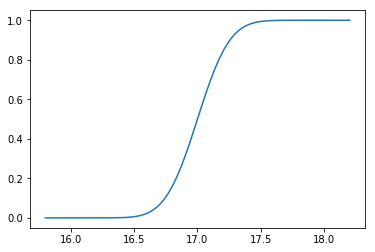

In [14]:
n = 100
loc = 17
scale = 2 / np.sqrt(n)

ox = np.linspace(loc-6*scale, loc+6*scale, 10000)
oy = np.array([norm.cdf(x, loc=loc, scale=scale) for x in ox])

plt.plot(ox, oy);

Для правосторонней критической области, нужно определить такое $t_{1-\alpha}$, что $1 - P(T < t_{1-\alpha}) = 0.05$

In [33]:
for x, y in zip(ox, oy):
    if y >= 1 - 0.05:
        t_alpha = x
        print(f'{round(t_alpha, 3)}')
        break

17.329


$$t_{1-\alpha}=17.329$$

Таким образом правостороння область критичности будет иметь вид:
$$\Omega_\alpha = (t_{1 - \alpha}, \infty) = (17.329, \infty)$$

Теперь необходимо проверить гипотезу. Средний размер диаметра для выборки из 100 элементов оказался равен $17.5$. Что входит в область критичности $(17.329, \infty)$. Следовательно гипотеза $H_0$ отвергается в пользу гипотезы $H_1$.

#### Ответ

Гипотеза о том, что средний диаметр подшипника равен 17 мм отвергается в пользу гипотезы о том, что средний диаметр подшипника больше 17 мм.

### Задача 2

Известно, что генеральная совокупность распределена нормально со средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочное среднее равно 80, а объём равен 256.

#### Решение

Воспользуемся t-распределением. И найдем интервал по формуле:

$$
\left( 
\overline{X} - t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{S}{\sqrt{n}}, 
\overline{X} + t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{S}{\sqrt{n}} 
\right)
$$

In [74]:
alpha = 0.05
n = 256
S = 16
m = 80

In [62]:
from scipy import stats

Нужный нам квантиль $t_{1 - \alpha/2, \: n - 1}$

In [75]:
Students_T = stats.t(n-1)
t = Students_T.ppf(1-alpha/2)
t

1.9693105698491928

Доверительный интервал:

In [76]:
confidence_interval = (m - t * S / np.sqrt(n), m + t * S / np.sqrt(n))

#### Ответ

In [77]:
confidence_interval

(78.0306894301508, 81.9693105698492)

### Задача 3

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

``202, 203, 199, 197, 195, 201, 200, 204, 194, 190``

Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%?

#### Решение

Для решения найдем доверительный интервал для оценки математического ожидания.

Найдём среднее и несмещённую оценку для среднего квадратического отклонения:

In [81]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

In [82]:
n = samples.size
m = samples.mean()
S = samples.std(ddof=1)

In [84]:
n, m, S

(10, 198.5, 4.453463071962462)

Зададим $\alpha=0.01$

In [102]:
alpha = 0.5

Воспользуемся t-распределением. И найдем интервал по формуле:

$$
\left( 
\overline{X} - t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{S}{\sqrt{n}}, 
\overline{X} + t_{1 - \alpha/2, \: n - 1} \cdot \dfrac{S}{\sqrt{n}} 
\right)
$$

Нужный нам квантиль $t_{1 - \alpha/2, \: n - 1}$

In [103]:
Students_T = stats.t(n-1)
t = Students_T.ppf(1-alpha/2)
t

0.7027221467513188

Доверительный интервал:

In [104]:
confidence_interval = (m - t * S / np.sqrt(n), m + t * S / np.sqrt(n))

In [105]:
confidence_interval

(197.51035030230693, 199.48964969769307)

#### Ответ

Оценка продавца принадлежит доверительному интервалу. Можно сказать, что его утверждение верно с уровнем доверия 99%.